In [2]:
import warnings
warnings.filterwarnings("ignore")

# Sınıflandırma Modelleri
Bu atölyede sınıflandırma modellerini teorik ve pratik olarak inceleyeceğiz. Veri seti olarak diyabet ile ilgili sağlık göstergelerinin yer aldığı bir veri seti kullanılacaktır. Aşağıdaki adımları takip ederek farklı sınıflandırma algoritmalarını öğrenecek ve uygulayacağız.

## 1. Giriş ve Teorik Bilgi
Sınıflandırma, verilen veri kümesinde bir hedef değişkene göre sınıflandırma yapma işlemidir. İkili sınıflandırmada hedef değişken yalnızca iki değer alabilir (örneğin, pozitif/negatif), çok sınıflı sınıflandırmada ise daha fazla sınıfa ayrılır. 
Bu atölyede lojistik regresyon, KNN, SVM, karar ağaçları, Random Forest ve Naive Bayes gibi sınıflandırma yöntemlerini inceleyeceğiz.


In [3]:
import pandas as pd

data = pd.read_csv('diabeties.csv')

In [4]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
data.columns = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker','Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies','HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth', 'PhysHlth', 'DiffWalk', 'Gender', 'Age', 'Education','Income']
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Gender', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
"""for i in range(len(data)):
    if data['Diabetes_012'][i] == 1:
        data['Diabetes_012'][i] = 0"""

"for i in range(len(data)):\n    if data['Diabetes_012'][i] == 1:\n        data['Diabetes_012'][i] = 0"

## 2. Lojistik Regresyon ile Başlangıç
Lojistik regresyon, sınıflandırma problemlerinde yaygın olarak kullanılan bir modeldir. Sigmoid fonksiyonu kullanarak sınıflandırma yapar ve karar sınırını belirler.

**Kod Uygulaması:**

In [8]:

# Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Bağımlı ve bağımsız değişkenlerin belirlenmesi
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Eğitim ve test verilerinin ayrılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik regresyon modelinin kurulması
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Model tahminleri ve başarı değerlendirmesi
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Doğruluk: {accuracy}")
print(f"Confusion Matrix:{conf_matrix}")


Doğruluk: 0.8482734153263954
Confusion Matrix:[[41753     0  1042]
 [  871     0    73]
 [ 5712     0  1285]]


## 3. KNN ve SVM
### KNN (K-Nearest Neighbors):
KNN algoritması, bir veri noktasının komşularına bakarak sınıflandırma yapar. Parametre olarak K değeri (komşu sayısı) ve mesafe ölçümü kullanılır.

### SVM (Destek Vektör Makineleri):
SVM, sınıflar arasındaki en iyi ayırıcı sınırı bulmayı amaçlar. Lineer ve lineer olmayan kernel fonksiyonları kullanarak sınıflandırma yapar.

**Kod Uygulaması:**

In [9]:

# KNN and SVM Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Doğruluk: {knn_accuracy}")

    

KNN Doğruluk: 0.8333530432040366


In [10]:
"""
# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Doğruluk: {svm_accuracy}")
"""
#buradaki modeli çalıştırmak çok uzun sürdüğü için yorum satırına aldım
#çalıştırmak isterseniz yorum satırını kaldırabilirsiniz
#ama çalışmış hali diğer belgede var.

'\n# SVM Model\nsvm_model = SVC(kernel=\'linear\')\nsvm_model.fit(X_train, y_train)\nsvm_pred = svm_model.predict(X_test)\nsvm_accuracy = accuracy_score(y_test, svm_pred)\nprint(f"SVM Doğruluk: {svm_accuracy}")\n'

## 4. Karar Ağaçları ve Random Forest
Karar ağaçları, veriyi dallara ayırarak sınıflandırma yapar. Random Forest, birden fazla karar ağacını birleştirerek daha güçlü tahminler yapar.

**Kod Uygulaması:**

In [31]:

# Decision Tree and Random Forest Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Karar Ağacı Modeli
tree_model = DecisionTreeClassifier(random_state=42,criterion='entropy',max_depth=7)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
print(f"Karar Ağacı Doğruluk: {tree_accuracy}")
conf_matrix = confusion_matrix(y_test, tree_pred)
print(f"Confusion Matrix:{conf_matrix}")


Karar Ağacı Doğruluk: 0.8484508041627247
Confusion Matrix:[[42332     0   463]
 [  893     0    51]
 [ 6282     0   715]]


In [12]:
# Random Forest Modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Doğruluk: {rf_accuracy}")


Random Forest Doğruluk: 0.8412172816146326


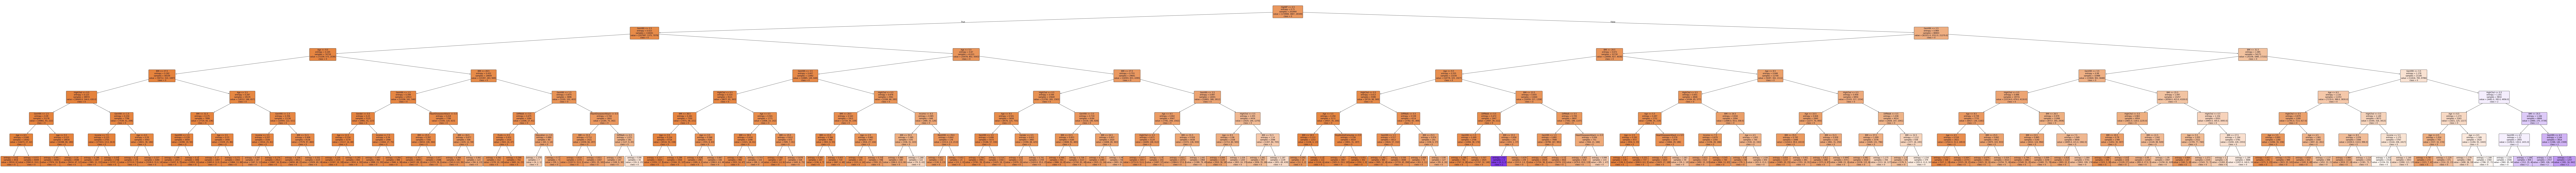

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Karar ağacını görselleştirme
plt.figure(figsize=(300,20))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['0', '1', '2'], rounded=True, fontsize=12)
plt.show()


In [18]:
import plotly.express as px
from sklearn import tree
import pandas as pd

# Karar ağacını inceleyip düğümleri çıkartalım
n_nodes = tree_model.tree_.node_count
children_left = tree_model.tree_.children_left
children_right = tree_model.tree_.children_right
feature = tree_model.tree_.feature
threshold = tree_model.tree_.threshold

# Karar ağacı düğümlerini DataFrame'e yerleştirme
node_depth = [0] * n_nodes
is_leaves = [False] * n_nodes
stack = [(0, 0)]  # (düğüm ID'si, derinlik)
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # Yaprak düğüm kontrolü
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

# Yaprak düğümleri için "Leaf" yerine sayısal bir değer kullanalım, örneğin 0
threshold_values = [round(thresh, 2) if thresh != -2 else 0 for thresh in threshold]

# Karar ağacını interaktif şekilde görselleştirme
df = pd.DataFrame({
    'nodes': list(range(n_nodes)),
    'depth': node_depth,
    'is_leaf': is_leaves,
    'feature': [X_train.columns[i] if i >= 0 else "Leaf" for i in feature],  # Feature adları
    'threshold': threshold_values  # Metin yerine sayısal değerler
})

# Plotly treemap görselleştirme
fig = px.treemap(df, path=['depth', 'nodes'], values='threshold', color='is_leaf', 
                 hover_data=['feature', 'threshold'])
fig.show()


## 5. Naive Bayes ve Diğer Yöntemler
Naive Bayes, koşullu olasılıklar üzerinden çalışan olasılık tabanlı bir sınıflandırma algoritmasıdır.

**Kod Uygulaması:**

In [14]:

# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Modeli
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Doğruluk: {nb_accuracy}")


Naive Bayes Doğruluk: 0.7537251655629139


## 6. Model Başarı Metrikleri ve Karşılaştırma
Sınıflandırma modellerini değerlendirirken doğruluk, hassasiyet, özgüllük ve F1 skoru gibi metrikler kullanılır. Ayrıca, ROC eğrisi ile model performansı daha iyi anlaşılabilir.

**Kod Uygulaması:**

## 6. Model Başarı Metrikleri ve Karşılaştırma (20 dakika)

Model başarı metrikleri, sınıflandırma algoritmalarının performansını değerlendirmede kullanılan önemli araçlardır. Aşağıda bu metriklerin kısa açıklamaları ve ne zaman kullanıldıkları belirtilmiştir.

### 1. Doğruluk (Accuracy):
Doğruluk, doğru sınıflandırılan örneklerin toplam veri kümesine oranıdır. Basit bir hesaplamadır, ancak sınıfların dengesiz olduğu durumlarda yanıltıcı olabilir. 

**Hesaplama Formülü:**
$$
\text{Doğruluk} = \frac{TP + TN}{TP + TN + FP + FN}
$$
- TP: True Positive (Doğru Pozitif)
- TN: True Negative (Doğru Negatif)
- FP: False Positive (Yanlış Pozitif)
- FN: False Negative (Yanlış Negatif)

### 2. Hassasiyet (Precision):
Hassasiyet, modelin pozitif olarak sınıflandırdığı örneklerden kaçının gerçekten pozitif olduğunu gösterir. Yanlış pozitifleri azaltmak istiyorsak hassasiyete odaklanmak önemlidir.

**Hesaplama Formülü:**
$$
\text{Hassasiyet} = \frac{TP}{TP + FP}
$$

### 3. Duyarlılık (Recall) ya da Tespit Oranı:
Duyarlılık, modelin tüm gerçek pozitifler arasında kaç tanesini doğru sınıflandırdığını gösterir. Yanlış negatiflerin azaltılması gereken durumlarda duyarlılık önemlidir.

**Hesaplama Formülü:**
$$
\text{Duyarlılık} = \frac{TP}{TP + FN}
$$

### 4. F1 Skoru:
F1 skoru, hassasiyet ve duyarlılığın harmonik ortalamasıdır. Dengeli bir değerlendirme sağlar ve sınıfların dengesiz olduğu durumlarda kullanışlıdır.

**Hesaplama Formülü:**
$$
\text{F1 Skoru} = 2 \times \frac{\text{Hassasiyet} \times \text{Duyarlılık}}{\text{Hassasiyet} + \text{Duyarlılık}}
$$

### 5. Özgüllük (Specificity):
Özgüllük, modelin negatif sınıfları doğru tanımlama oranını ifade eder. Gerçek negatiflerin doğru tahmin edilmesi gereken uygulamalarda kullanılır.

**Hesaplama Formülü:**
$$
\text{Özgüllük} = \frac{TN}{TN + FP}
$$

### 6. Confusion Matrix:
Confusion matrix, sınıflandırma modelinin tahminlerini görselleştirmenin bir yoludur. Modelin doğru ve yanlış tahminlerini pozitif ve negatif sınıflar için ayrı ayrı gösterir. Confusion matrix sayesinde doğruluk, hassasiyet, özgüllük gibi metrikler hesaplanabilir.

**Confusion Matrix Örneği:**
$$
\begin{matrix}
& \textbf{Gerçek Pozitif} & \textbf{Gerçek Negatif} \\
\textbf{Tahmin Pozitif} & TP & FP \\
\textbf{Tahmin Negatif} & FN & TN \\
\end{matrix}
$$

### Kod Uygulaması:
Bu bölümde, yukarıdaki metrikleri hesaplayan ve ROC eğrisini çizen kodu yazacağız. Tüm sınıflandırma modellerini değerlendirip karşılaştıracağız.


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Model tahminleri
y_pred = log_model.predict(X_test)

# Doğruluk, Hassasiyet, F1 Skoru
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Doğruluk: {accuracy}")
print(f"Hassasiyet: {precision}")
print(f"Duyarlılık: {recall}")
print(f"F1 Skoru: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")


Doğruluk: 0.8482734153263954
Hassasiyet: 0.8024470392071671
Duyarlılık: 0.8482734153263954
F1 Skoru: 0.8106261854311295
Confusion Matrix: 
[[41753     0  1042]
 [  871     0    73]
 [ 5712     0  1285]]


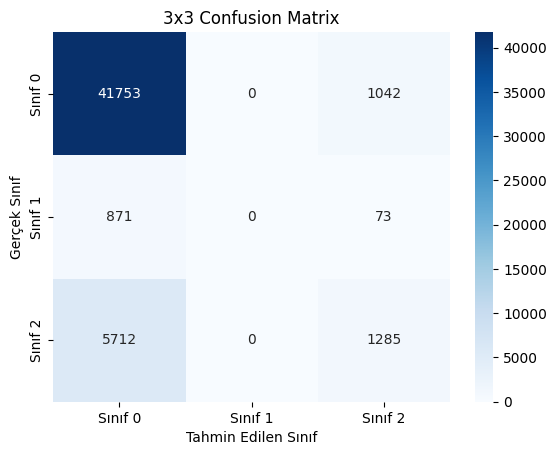

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion Matrix görselleştirme (3 sınıflı)
sns.heatmap(conf_matrix, 
            annot=True,  # Hücrelerde sayıları gösterir
            fmt='d',     # Tam sayı formatı
            xticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], 
            yticklabels=['Sınıf 0', 'Sınıf 1', 'Sınıf 2'], 
            cmap='Blues')  # Renk haritası ayarı

plt.title('3x3 Confusion Matrix')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.show()
